<a href="https://colab.research.google.com/github/yooyeollee/2022/blob/main/201902697_12_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
pwd

'/content/drive/MyDrive/data'

In [ ]:
ls

archive/


In [ ]:
cd archive

/content/drive/MyDrive/data/archive


In [ ]:
ls

non_smile/  smile/


In [ ]:
cd non_smile

/content/drive/MyDrive/data/archive/non_smile


Text(0.5, 1.0, 'non_smile')

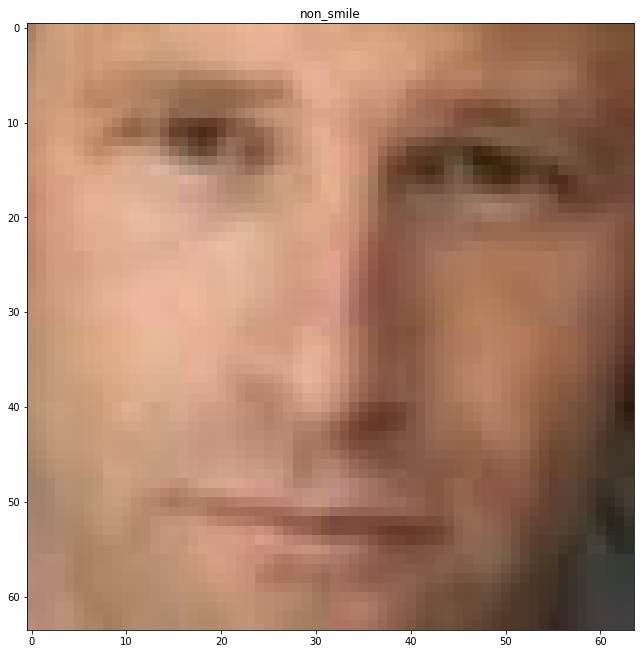

In [ ]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt


image_sample= imread('Aaron_Eckhart_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('non_smile')

In [ ]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [ ]:
cd archive

/content/drive/MyDrive/data/archive


In [ ]:
cd smile

/content/drive/MyDrive/data/archive/smile


Text(0.5, 1.0, 'Adult')

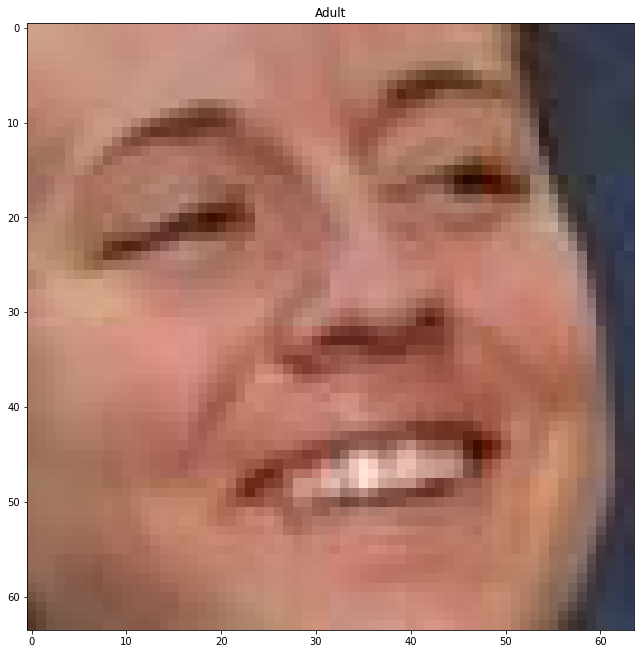

In [ ]:
image_sample2= imread('Jamie_Carey_0001.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('Adult')

In [ ]:
image_sample2.shape

(64, 64, 3)

In [ ]:
cd /

/


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam


train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환 ## 이것은 사실상 필수 사항입니다.
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )


train = train_gen.flow_from_directory(directory='../content/drive/MyDrive/data',
                                              target_size=(160, 185),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize, 사이즈를 원하는 모양으로 조절이 가능해요.
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='categorical', # class_mode='binary',
                                              batch_size=20,
                                              shuffle=True)


valid_gen = ImageDataGenerator(
        rescale=1./255        
    ) 


test = valid_gen.flow_from_directory(directory='../content/drive/MyDrive/data',
                                              target_size=(160, 185),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='categorical', # class_mode='binary',
                                              batch_size=3,
                                              shuffle=True)


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(160, 185, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
### [1,0]과 [0,1]이므로 위와 같이 했습니다.
### 만약 위에서 class_mode='binary'설정했다면, Dense(1,activation='sigmoid' )가 되여야 하고, 아래 compile을 loss=' binary_crossentropy'해야 합니다.

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

model.fit_generator(train, validation_data = test, epochs=5 )


Found 1243 images belonging to 1 classes.
Found 1243 images belonging to 1 classes.


<ipython-input-61-5e2d43588034>:58: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train, validation_data = test, epochs=5 )


Epoch 1/5
63/63 [==============================] - 336s 5s/step - loss: 56735.5430 - accuracy: 0.5889 - val_loss: 153423.0625 - val_accuracy: 1.0000
Epoch 2/5
63/63 [==============================] - 208s 3s/step - loss: 2111761.0000 - accuracy: 0.6203 - val_loss: 1263180.0000 - val_accuracy: 1.0000
Epoch 3/5
63/63 [==============================] - 211s 3s/step - loss: 15221487.0000 - accuracy: 0.5776 - val_loss: 7846704.5000 - val_accuracy: 1.0000
Epoch 4/5
63/63 [==============================] - 208s 3s/step - loss: 54577816.0000 - accuracy: 0.5688 - val_loss: 2372881.0000 - val_accuracy: 1.0000
Epoch 5/5
63/63 [==============================] - 211s 3s/step - loss: 127313304.0000 - accuracy: 0.5535 - val_loss: 21465420.0000 - val_accuracy: 1.0000
